# Модуль 2. Анализ данных

Практическое задание

* Получите из seaborn датасет ирисов.

* Проанализируйте данные с помощью группировки и получите статистику с помощью pandas.

* Постройте графики по этим данным с помощью seaborn.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = sns.load_dataset('iris')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<AxesSubplot:xlabel='species', ylabel='petal_width'>

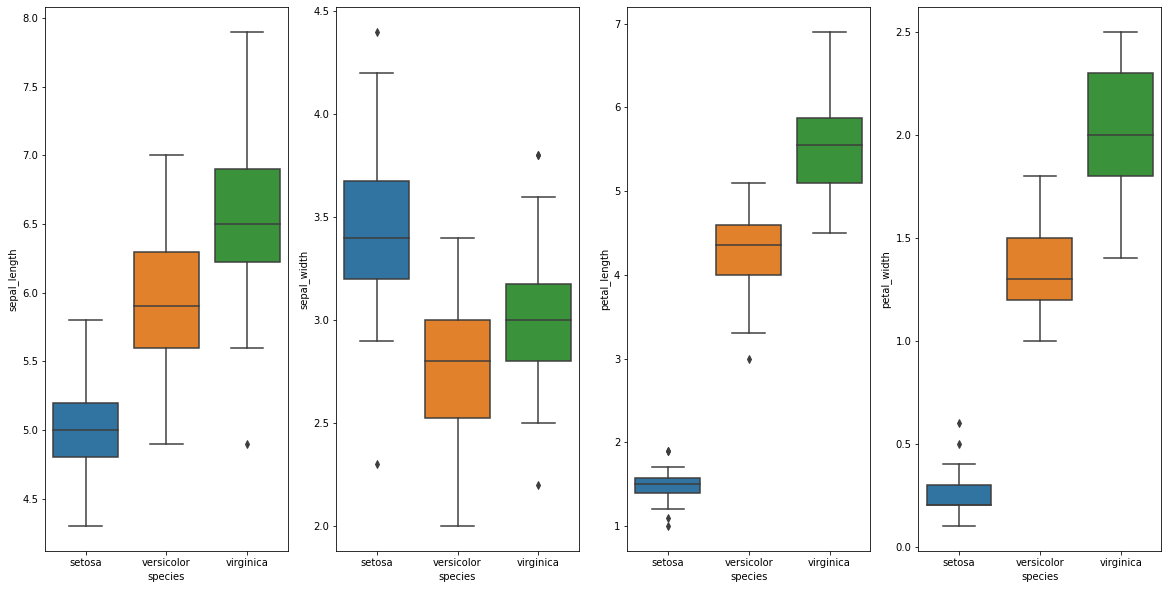

In [6]:
figure,axes = plt.subplots(1,4,figsize = (20,10))
sns.boxplot(data = df, x = 'species', y = 'sepal_length',ax=axes[0])
sns.boxplot(data = df, x = 'species', y = 'sepal_width',ax=axes[1])
sns.boxplot(data = df, x = 'species', y = 'petal_length',ax=axes[2])
sns.boxplot(data = df, x = 'species', y = 'petal_width',ax=axes[3])

In [7]:
df['sepal_square'] = df['sepal_length'] * df['sepal_width']
df['petal_square'] = df['petal_length'] * df['petal_width']
df['sepal_petal_ratio'] = df['sepal_width'] / df['petal_square']
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_square,petal_square,sepal_petal_ratio
0,5.1,3.5,1.4,0.2,setosa,17.85,0.28,12.500000
1,4.9,3.0,1.4,0.2,setosa,14.70,0.28,10.714286
2,4.7,3.2,1.3,0.2,setosa,15.04,0.26,12.307692
3,4.6,3.1,1.5,0.2,setosa,14.26,0.30,10.333333
4,5.0,3.6,1.4,0.2,setosa,18.00,0.28,12.857143


<AxesSubplot:xlabel='species', ylabel='sepal_petal_ratio'>

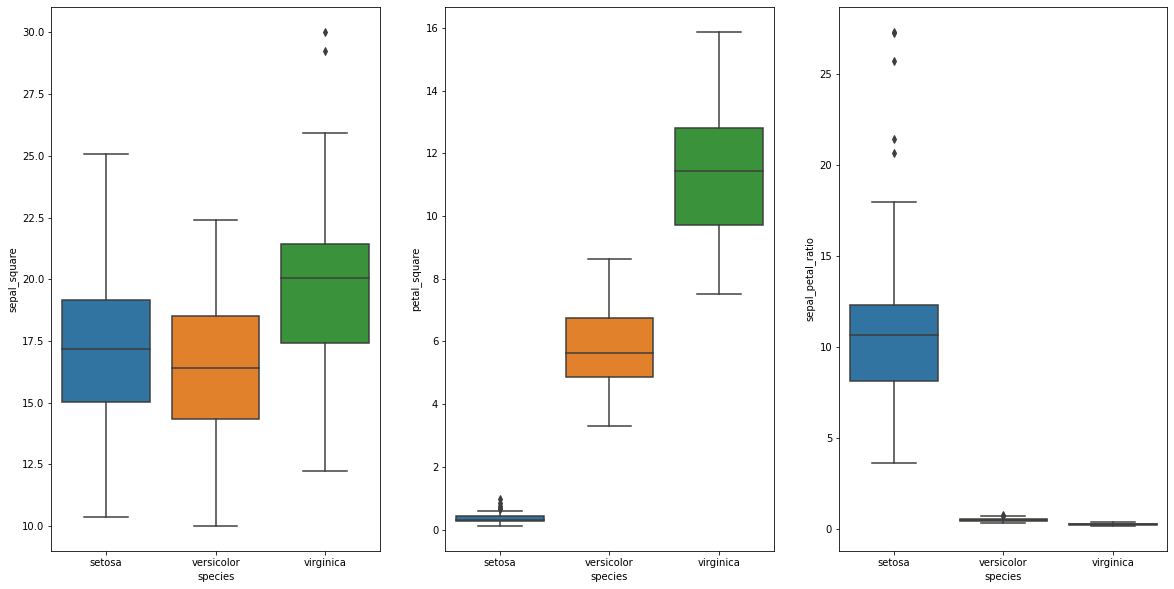

In [8]:
figure,axes = plt.subplots(1,3,figsize = (20,10))
sns.boxplot(data = df, x = 'species', y = 'sepal_square',ax=axes[0])
sns.boxplot(data = df, x = 'species', y = 'petal_square',ax=axes[1])
sns.boxplot(data = df, x = 'species', y = 'sepal_petal_ratio',ax=axes[2])

In [9]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,sepal_square,petal_square,sepal_petal_ratio
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,17.822867,5.794067,4.068911
std,0.828066,0.435866,1.765298,0.762238,3.361854,4.712390,6.077656
min,4.300000,2.000000,1.000000,0.100000,10.000000,0.110000,0.163831
25%,5.100000,2.800000,1.600000,0.300000,15.660000,0.420000,0.298414
50%,5.800000,3.000000,4.350000,1.300000,17.660000,5.615000,0.489719
75%,6.400000,3.300000,5.100000,1.800000,20.325000,9.690000,7.946429
max,7.900000,4.400000,6.900000,2.500000,30.020000,15.870000,27.333333


In [10]:
df['little_big'] = df.sepal_petal_ratio.apply(lambda x: 'little' if x < 0.5 else 'big')

<AxesSubplot:xlabel='little_big', ylabel='sepal_petal_ratio'>

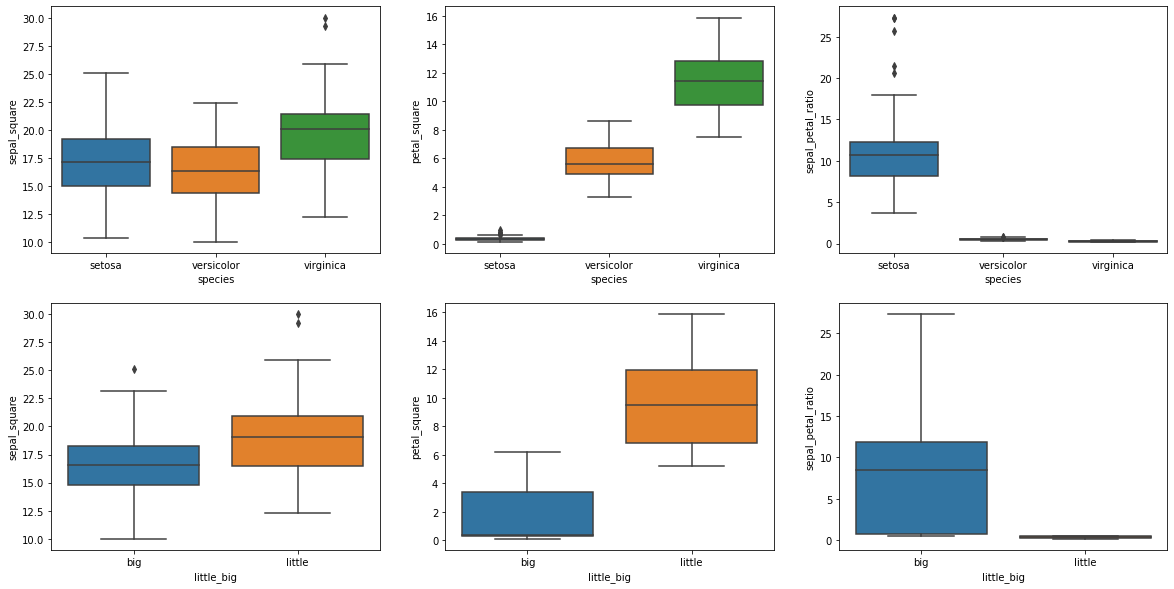

In [11]:
figure,axes = plt.subplots(2,3,figsize = (20,10))
sns.boxplot(data = df, x = 'species', y = 'sepal_square',ax=axes[0,0])
sns.boxplot(data = df, x = 'species', y = 'petal_square',ax=axes[0,1])
sns.boxplot(data = df, x = 'species', y = 'sepal_petal_ratio',ax=axes[0,2])
sns.boxplot(data = df, x = 'little_big', y = 'sepal_square',ax=axes[1,0])
sns.boxplot(data = df, x = 'little_big', y = 'petal_square',ax=axes[1,1])
sns.boxplot(data = df, x = 'little_big', y = 'sepal_petal_ratio',ax=axes[1,2])

In [12]:
from sklearn.metrics import confusion_matrix, auc, mean_squared_error, recall_score, precision_score, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [13]:
encoder = LabelEncoder()
target = encoder.fit_transform(df['species'])
data = df.drop('species',axis = 1)
data = pd.get_dummies(data,drop_first=True)
data['target'] = target
data_1 = data[data.target == 0]
data_2 = data[data.target == 1]
data_3 = data[data.target == 2]

In [14]:
dtc = DecisionTreeClassifier()
etc = ExtraTreeClassifier()
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
rfc = RandomForestClassifier()
lgc = LogisticRegression()
x_train_1, x_test_1,y_train_1, y_test_1 = train_test_split(data_1.drop('target',axis = 1),data_1.target,test_size=0.3,random_state=10)
x_train_2, x_test_2,y_train_2, y_test_2 = train_test_split(data_2.drop('target',axis = 1),data_2.target,test_size=0.3,random_state=10)
x_train_3, x_test_3,y_train_3, y_test_3 = train_test_split(data_3.drop('target',axis = 1),data_3.target,test_size=0.3,random_state=10)
x_train = pd.concat([x_train_1,x_train_2,x_train_3])
x_test = pd.concat([x_test_1,x_test_2,x_test_3])
y_train = pd.concat([y_train_1,y_train_2,y_train_3])
y_test = pd.concat([y_test_1,y_test_2,y_test_3])
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((105, 8), (45, 8), (105,), (45,))

### DecisionTreeClassifier

In [15]:
dtc.fit(x_train,y_train)
y_hat = np.argwhere(dtc.predict_proba(x_test)==1)
r2 = r2_score(y_test,y_hat[:,1])
recall = recall_score(y_test,y_hat[:,1], average='weighted')
precision = precision_score(y_test,y_hat[:,1], average='weighted')
print(f'r2 = {r2}, \nrecall = {recall}, \nprecision = {precision}')

r2 = 0.9333333333333333, 
recall = 0.9555555555555556, 
precision = 0.9555555555555556


### ExtraTreeClassifier

In [16]:
etc.fit(x_train,y_train)
y_hat = np.argwhere(etc.predict_proba(x_test)==1)
r2 = r2_score(y_test,y_hat[:,1])
recall = recall_score(y_test,y_hat[:,1], average='weighted')
precision = precision_score(y_test,y_hat[:,1], average='weighted')
print(f'r2 = {r2}, \nrecall = {recall}, \nprecision = {precision}')

r2 = 0.9, 
recall = 0.9333333333333333, 
precision = 0.9345238095238095


### AdaBoostClassifier

In [17]:
abc.fit(x_train,y_train)
y_hat = [np.argwhere(i==i.max())[0][0] for k,i in enumerate(abc.predict_proba(x_test))]
r2 = r2_score(y_test,y_hat)
r2

0.9333333333333333

### GradientBoostingClassifier

In [18]:
gbc.fit(x_train,y_train)
y_hat = [np.argwhere(i==i.max())[0][0] for k,i in enumerate(gbc.predict_proba(x_test))]
r2 = r2_score(y_test,y_hat)
recall = recall_score(y_test,y_hat, average='weighted')
precision = precision_score(y_test,y_hat, average='weighted')
print(f'r2 = {r2}, \nrecall = {recall}, \nprecision = {precision}')

r2 = 0.9333333333333333, 
recall = 0.9555555555555556, 
precision = 0.9555555555555556


### RandomForestClassifier

In [19]:
rfc.fit(x_train,y_train)
y_hat = [np.argwhere(i==i.max())[0][0] for k,i in enumerate(rfc.predict_proba(x_test))]
r2 = r2_score(y_test,y_hat)
recall = recall_score(y_test,y_hat, average='weighted')
precision = precision_score(y_test,y_hat, average='weighted')
print(f'r2 = {r2}, \nrecall = {recall}, \nprecision = {precision}')

r2 = 0.9333333333333333, 
recall = 0.9555555555555556, 
precision = 0.9555555555555556


### LogisticRegression

In [20]:
st_scaler = StandardScaler()
x_train_lgc = st_scaler.fit_transform(x_train)
lgc.fit(x_train_lgc,y_train)
x_test_lgc = st_scaler.transform(x_test)
y_hat = [np.argwhere(i==i.max())[0][0] for k,i in enumerate(lgc.predict_proba(x_test_lgc))]
r2 = r2_score(y_test,y_hat)
recall = recall_score(y_test,y_hat, average='weighted')
precision = precision_score(y_test,y_hat, average='weighted')
print(f'r2 = {r2}, \nrecall = {recall}, \nprecision = {precision}')

r2 = 0.9666666666666667, 
recall = 0.9777777777777777, 
precision = 0.9791666666666666
